In [10]:
import numpy as np
import pandas as pd

In [11]:
data = pd.read_csv('iris_dataset.csv')

In [12]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data.drop(columns='target')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
df_sepal = data[['sepal length (cm)',
                  'sepal width (cm)']].rename(columns={
                                'sepal length (cm)': 'length', 
                                'sepal width (cm)': 'width'})
df_sepal['Label'] = 0

In [15]:
df_petal = data[['petal length (cm)',
                  'petal width (cm)']].rename(columns={
                                'petal length (cm)': 'length', 
                                'petal width (cm)': 'width'})
df_petal['Label'] = 1

In [16]:
Data_main = pd.concat([df_sepal, df_petal], ignore_index=True)

In [17]:
Data_main

,length,width,Label
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
295,5.2,2.3,1
296,5.0,1.9,1
297,5.2,2.0,1
298,5.4,2.3,1


New data belongs to class which has the label as: 1


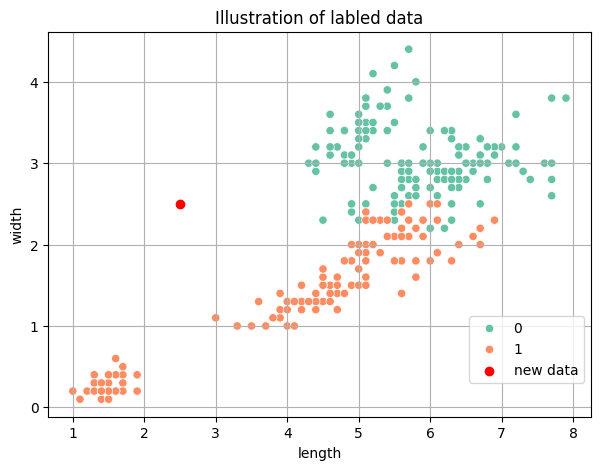

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

new_data = np.array([2.5, 2.5])
input_k = 20

fig = plt.figure(figsize=(7, 5), dpi=100)
plt.title('Illustration of labled data')
sns.scatterplot(Data_main, x='length', y='width', 
                hue='Label', palette='Set2')
plt.scatter(new_data[0], new_data[1],color='r', marker='o', label='new data')
plt.legend(bbox_to_anchor=(1, 0.28))
plt.grid(True)
#plt.savefig('Savefig.png')

#Data_main['distance'] = np.sqrt((Data_main['length'] - new_data[0])**2 
#                                + 
#                                (Data_main['width'] - new_data[1])**2) 
#Data_main['Label'].min(10)

def KNN(dataset, input_data, k):
    dataset['distance'] = np.sqrt((dataset['length'] - input_data[0])**2 
                                + 
                                (dataset['width'] - input_data[1])**2)

    
    
    k_min = dataset.nsmallest(k, 'distance')

    Labeled_new = k_min.value_counts('Label').index.max()

    print(f'New data belongs to class which has the label as: {Labeled_new}')

KNN(Data_main, new_data, 10)